In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [179]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [180]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [181]:
for val in df.columns:
    print(df[val].value_counts())
    print('*********************************')

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
*********************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
*********************************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
*********

In [182]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [183]:
df = df.drop(columns=['society','balcony','availability'])

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [185]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [186]:
df.shape

(13320, 6)

In [187]:
df.dropna(inplace=True)

In [188]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [189]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [190]:
df.describe()

,bath,price
count,13246.000000,13246.000000
mean,2.692586,112.389392
std,1.341506,149.076587
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [191]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [192]:
df['bhk'] = df['size'].apply(lambda x: x.split(' ')[0])
df['bhk'] = df['bhk'].astype(int)

In [193]:
df.head(3)

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [194]:
sorted(list(df['bhk'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 27, 43]

In [195]:
df[df['bhk']>19]

,area_type,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [196]:
sorted(df['total_sqft'].unique())

['1',
 '1.25Acres',
 '1.26Acres',
 '1000',
 '1000 - 1285',
 '10000',
 '1000Sq. Meter',
 '1001',
 '1002',
 '1003',
 '10030',
 '1004',
 '1004 - 1204',
 '1005',
 '1005.03 - 1252.49',
 '1006',
 '1007',
 '1008',
 '1009',
 '1010',
 '1010 - 1300',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1015 - 1540',
 '1016',
 '1017',
 '1018',
 '1019',
 '1020',
 '1020.07',
 '10200',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1039',
 '1040',
 '1041',
 '1042 - 1105',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '1050',
 '1051',
 '1052',
 '1052 - 1322',
 '1053',
 '1053.4',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1060',
 '1061',
 '1062',
 '10624',
 '1063',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '1070',
 '1070 - 1315',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1076 - 1199',
 '1077',
 '1078',
 '1079',
 '1079 - 1183',
 '1080',
 '1081',
 '1082',
 '1083',

In [197]:
def is_float(text):
    try: 
        float(text)
    except:
        return False
    return True

In [198]:
# all without float came out
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [199]:
df[~df['total_sqft'].apply(is_float)].shape

(190, 7)

In [200]:
def convert_sq_to_num(x):
    t = x.split('-')
    if len(t) == 2:
        return(float(float(t[0])+float(t[1])/2))
    try:
        return float(x)
    except:
        pass

In [201]:
convert_sq_to_num('2234')

2234.0

In [202]:
convert_sq_to_num('11-34')

28.0

In [203]:
convert_sq_to_num('4343sqm')

In [204]:
df_copy = df.copy()

In [205]:
df['total_sqft'] = df['total_sqft'].apply(convert_sq_to_num)

In [206]:
df.head(4)

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [207]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [208]:
# price is in lakhs
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [209]:
df.head(4)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861


In [210]:
df['location'].nunique()

1304

In [211]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [212]:
location_count = df['location'].value_counts()
location_10 = location_count[location_count<10]

In [213]:
df['location'] = df['location'].apply(lambda x: 'other location' if x in location_10 else x)

In [214]:
df['location'].nunique()

254

In [215]:
df.head(10)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other location,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [216]:
# we will remove these becuase a room can't be so small
df[(df.total_sqft/df.bhk)<300]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other location,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other location,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other location,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,other location,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other location,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [217]:
df = df[(df.total_sqft/df.bhk)>=300]
df.shape

(12456, 8)

In [218]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1598.841548,2.562781,111.187960,2.649004,6290.299983
std,1269.660904,1.080275,152.203367,0.976046,4175.619211
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1118.000000,2.000000,49.000000,2.000000,4186.725844
50%,1300.000000,2.000000,70.000000,3.000000,5281.690141
75%,1702.250000,3.000000,115.000000,3.000000,6904.652015
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [219]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10216, 8)

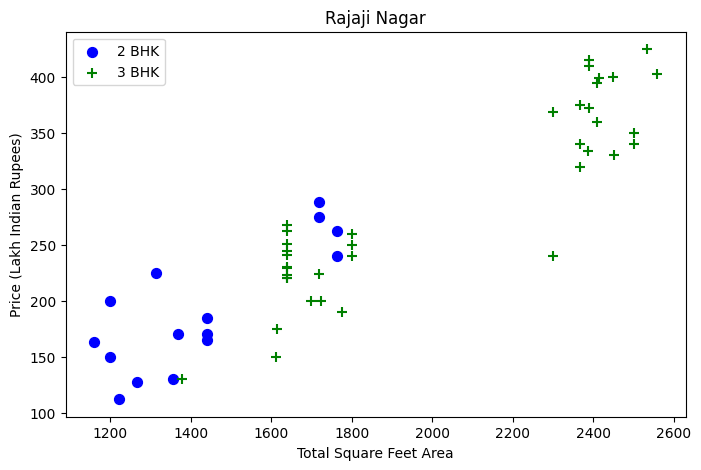

In [220]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(8,5))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

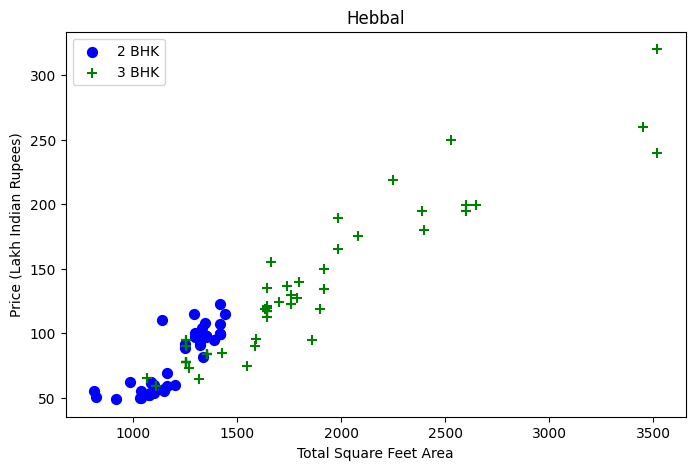

In [221]:
plot_scatter_chart(df,"Hebbal")

In [222]:
df.shape

(10216, 8)

In [223]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df1 = remove_bhk_outliers(df)
df1.shape

(7376, 8)

Text(0, 0.5, 'Count')

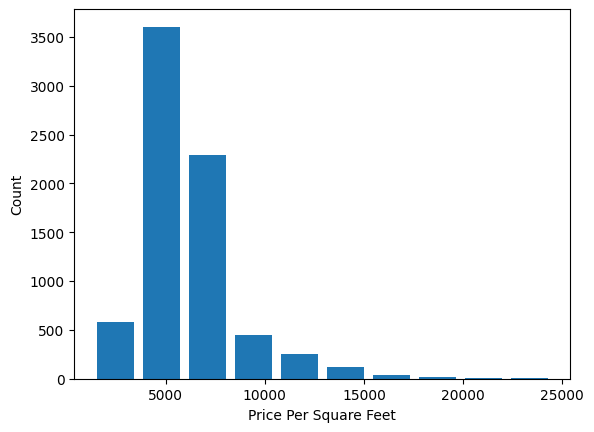

In [224]:
import matplotlib
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [225]:
df1.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

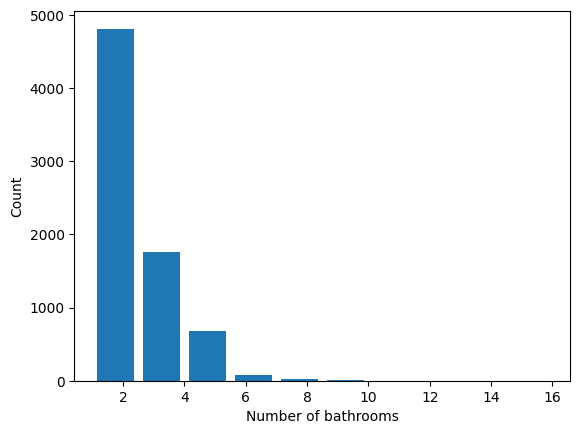

In [226]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [227]:
df1[df1.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
597,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
5334,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,Super built-up Area,other location,10 BHK,12000.0,12.0,525.0,10,4375.000000
8613,Super built-up Area,other location,16 BHK,10000.0,16.0,550.0,16,5500.000000
9317,Super built-up Area,other location,11 BHK,6000.0,12.0,150.0,11,2500.000000
9633,Super built-up Area,other location,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [228]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df1[df1.bath>df1.bhk+2]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
597,Plot Area,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1652,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5295,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6770,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,Super built-up Area,other location,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [229]:
df1 =df1[~(df1.bath>df1.bhk+2)]

In [230]:
df1.shape

(7371, 8)

In [231]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [232]:
df1.head(2)

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667


In [233]:
df1 = df1.drop(columns=['area_type','size','price_per_sqft'])

In [234]:
df1.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [235]:
x = df1.drop(columns=['price'])
y = df1['price']

In [236]:
df1.shape

(7371, 5)

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [238]:
from sklearn.preprocessing import StandardScaler
trf = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first',sparse=False),[0])
    ],remainder='passthrough')

In [239]:
x_train_tr = trf.fit_transform(x_train)
x_test_tr  = trf.transform(x_test)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [240]:
from sklearn.linear_model import Lasso,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [241]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error
lr = LinearRegression()
lr.fit(x_train_tr,y_train)
y_pred = lr.predict(x_test_tr)
print("R2 score: ", r2_score(y_test , y_pred))
print("MAE: ", mean_absolute_error(y_test , y_pred))
print("MSE: ", mean_squared_error(y_test , y_pred))

R2 score:  0.8811872511274063
MAE:  18.095674526413976
MSE:  1090.8557406182929


In [242]:
# rf = RandomForestRegressor()
# rf.fit(x_train_tr,y_train)
# y_pred = rf.predict(x_test_tr)
# print("R2 score: ", r2_score(y_test , y_pred))
# print("MAE: ", mean_absolute_error(y_test , y_pred))
# print("MSE: ", mean_squared_error(y_test , y_pred))

In [243]:
sg = SGDRegressor()
sg.fit(x_train_tr,y_train)
y_pred = sg.predict(x_test_tr)
print("R2 score: ", r2_score(y_test , y_pred))
print("MAE: ", mean_absolute_error(y_test , y_pred))
print("MSE: ", mean_squared_error(y_test , y_pred))

R2 score:  -9.494048766263883e+25
MAE:  766948484427305.0
MSE:  8.716772986621741e+29


In [244]:
dt = DecisionTreeRegressor()
dt.fit(x_train_tr,y_train)
y_pred = dt.predict(x_test_tr)
print("R2 score: ", r2_score(y_test , y_pred))
print("MAE: ", mean_absolute_error(y_test , y_pred))
print("MSE: ", mean_squared_error(y_test , y_pred))

R2 score:  0.8497590368110083
MAE:  17.306663831084173
MSE:  1379.4076706909493


In [245]:
from sklearn.pipeline import Pipeline

In [246]:
pipe = Pipeline([('trf',trf),('lr',LinearRegression())])

In [247]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print("R2 score: ", r2_score(y_test , y_pred))
print("MAE: ", mean_absolute_error(y_test , y_pred))
print("MSE: ", mean_squared_error(y_test , y_pred))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score:  0.8811872511274063
MAE:  18.095674526413976
MSE:  1090.8557406182929


In [248]:
import pickle
with open('pipe.pkl','wb') as w:
    pickle.dump(pipe,w)

In [249]:
with open('df.pkl','wb') as w:
    pickle.dump(df1,w)

In [250]:
df1.sample(5)

,location,total_sqft,bath,price,bhk
1776,Devanahalli,1080.0,2.0,52.00,2
7076,Varthur,1140.0,2.0,39.90,2
5229,NRI Layout,1125.0,2.0,45.56,2
9507,other location,680.0,3.0,60.00,2
6048,Sarjapur,1195.0,2.0,42.00,2


In [251]:
x_test

,location,total_sqft,bath,bhk
3904,Kaggadasapura,1225.0,2.0,2
9952,other location,1115.0,2.0,2
8580,other location,6200.0,5.0,5
9164,other location,1050.0,2.0,2
3249,Horamavu Agara,1079.0,2.0,2
...,...,...,...,...
7360,Whitefield,1195.0,2.0,2
5617,Rachenahalli,985.0,2.0,2
6183,Sarjapur Road,1263.0,2.0,2
6933,Uttarahalli,1085.0,2.0,2


In [252]:
x_test.iloc[8:9,:]

,location,total_sqft,bath,bhk
1653,Chikkabanavar,2400.0,4.0,5


In [253]:
pipe.predict(x_test.iloc[8:9,:])

array([105.26422812])

In [254]:
pipe.predict([['other location',1489.0,2.0,2]])

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([119.66027872])

In [255]:
new_data = pd.DataFrame({
    'location': ['other location'],
    'total_sqft': [1489.0],
    'bath': [2.0],
    'bhk': [2]
})

prediction = pipe.predict(new_data)
print(prediction)


[119.66027872]


In [256]:
# Use a dummy category from the training data for testing
new_data = pd.DataFrame({
      # Use a valid category from training
    'location': ['other location'],
    'total_sqft': [1489.0],
    'bath': [2.0],
    'bhk': [2]
})

prediction = pipe.predict(new_data)
print(prediction)


[119.66027872]
